**TRABAJO PRÁCTICO APRENDIZAJE AUTOMÁTICO I TUIA 2024**

INTEGRANTES:

Herrera Morena (H-1187/8)

Zorzolo Rubio Juana (Z-1217/3)

En este trabajo, se tiene como objetivo predecir los precios de las viviendas en Boston (MEDV) a partir de un conjunto de características socioeconómicas. Empleamos el conjunto de datos house-prices.csv.

Utilizamos técnicas de Regresión Lineal, y exploramos diferentes enfoques de optimización de modelos, como la variación de hiperparámetros y el uso de regularización, con el fin de mejorar los resultados y seleccionar el modelo que mejor se ajuste a los datos.

# Carga de datos

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error

In [ ]:
# Montamos Google Drive de esta manera ya que nos permite acceder a los archivos almacenados en el mismo directamente desde el entorno de trabajo en Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Cargamos desde la ruta directa de Drive, el dataset seleccionado
df_house = pd.read_csv('C:/Users/juana/OneDrive/Documentos/TP AA1/house-prices-tp.csv')
df_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


### Información general

Obtenemos información general del dataset y las columnas que lo componen, observando la presencia de valores faltantes y/o nulos para posteriormente tratarlos de la mejor manera posible.

In [3]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


In [4]:
df_house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,533.000000,534.000000,541.000000,533.000000,532.000000,535.000000,532.000000,541.000000,528.000000,538.000000,528.000000,534.000000,534.000000,535.000000
mean,5.845517,13.197175,11.218725,0.090056,0.560050,6.291839,67.632303,3.944102,9.699379,409.575089,18.429904,347.806040,13.028092,22.746809
std,13.828631,24.902981,6.942021,0.286531,0.119472,0.782403,28.461925,2.255689,8.684495,167.689379,2.194759,99.636208,7.579972,9.491452
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084470,0.000000,5.130000,0.000000,0.453000,5.875500,42.275000,2.112100,4.000000,279.000000,17.000000,369.530000,7.150000,16.750000
50%,0.315330,0.000000,9.690000,0.000000,0.538000,6.208000,76.500000,3.340107,5.000000,335.000000,19.000000,390.815000,11.465000,21.200000
75%,4.871410,20.000000,18.100000,0.000000,0.643986,6.638500,93.825000,5.400700,23.632660,666.000000,20.200000,395.890000,17.205000,26.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Partición de datos

Se decidió realizar la validación cruzada train-test antes de la limpieza y análisis del conjunto de datos ya que así aseguramos que el modelo evalúe de manera justa en datos que nunca ha visto durante el entrenamiento. El objetivo es simular cómo se comportaría el modelo con datos reales, fuera del entorno controlado.

Separamos las variables independientes (X) de la variable dependiente (y), que en nuestro trabajo es la variable MEDV (a quien queremos predecir).

In [5]:
X = df_house.drop("MEDV", axis=1)
y = df_house["MEDV"]

Dividimos también los datos en TRAIN y TEST, fundamental para poder entrenar nuestro modelo y luego testearlo.

Decidimos separar un 80% para entrenamiento, y el 20% restante para prueba.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((444, 13), (112, 13), (444,), (112,))

In [8]:
# Combinamos los datas de entrenamiento y los de testeo para mayor facilidad al momento de trabajarlos
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Limpieza de datos

## Valores nulos

### Para df_train

Respecto a los valores nulos, la primer decisión que tomamos fue eliminar las filas que contengan más del 70% de variables con valores nulos, ya que consideramos que es muy probable que la información que contienen sea insuficiente o poco representativa para realizar un análisis adecuado. Mantener estas filas podría generar ruido en el modelo, afectando negativamente la calidad de las predicciones.

In [9]:
filas_nan = df_train[df_train.isna().sum(axis=1) > 9]
q_filas_nan = len(filas_nan)
df_train = df_train.dropna(thresh=df_train.shape[1] - 9)

Luego, tomamos la decisión de imputar los valores faltantes:

- A la variable categórica CHAS con la moda
- Al resto de las variables con el promedio

No utilizamos KNN para la imputación de datos faltantes ya que no tenemos certeza de que las observaciones sigan un criterio de organización claro, como por ejemplo, la recolección por zona. En tal caso, si podriamos confiar en los resultados de KNN.

In [10]:
df_train['CHAS'].fillna(df_train['CHAS'].mode().iloc[0], inplace=True)

C:\Users\juana\AppData\Local\Temp\ipykernel_18012\3227214440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['CHAS'].fillna(df_train['CHAS'].mode().iloc[0], inplace=True)


In [11]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(df_train)
df_train_imputed = pd.DataFrame(imputer.transform(df_train), columns = df_train.columns)

Confirmamos los cambios realizados:

In [12]:
df_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     434 non-null    float64
 1   ZN       434 non-null    float64
 2   INDUS    434 non-null    float64
 3   CHAS     434 non-null    float64
 4   NOX      434 non-null    float64
 5   RM       434 non-null    float64
 6   AGE      434 non-null    float64
 7   DIS      434 non-null    float64
 8   RAD      434 non-null    float64
 9   TAX      434 non-null    float64
 10  PTRATIO  434 non-null    float64
 11  B        434 non-null    float64
 12  LSTAT    434 non-null    float64
 13  MEDV     434 non-null    float64
dtypes: float64(14)
memory usage: 47.6 KB


### Para df_test

Tanto para los datos de entrenamiento, como para los de testeo, se tomaron las mismas decisiones.

In [13]:
filas_nan = df_test[df_test.isna().sum(axis=1) > 9]
q_filas_nan = len(filas_nan)
df_test = df_test.dropna(thresh=df_test.shape[1] - 9)

In [14]:
df_test['CHAS'].fillna(df_test['CHAS'].mode().iloc[0], inplace=True)

C:\Users\juana\AppData\Local\Temp\ipykernel_18012\2223118995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['CHAS'].fillna(df_test['CHAS'].mode().iloc[0], inplace=True)


In [15]:
# Imputamos df_test usando la misma media calculada para df_train
df_test_imputed = pd.DataFrame(imputer.transform(df_test), columns = df_test.columns)

Confirmamos los cambios realizados:

In [16]:
df_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     112 non-null    float64
 1   ZN       112 non-null    float64
 2   INDUS    112 non-null    float64
 3   CHAS     112 non-null    float64
 4   NOX      112 non-null    float64
 5   RM       112 non-null    float64
 6   AGE      112 non-null    float64
 7   DIS      112 non-null    float64
 8   RAD      112 non-null    float64
 9   TAX      112 non-null    float64
 10  PTRATIO  112 non-null    float64
 11  B        112 non-null    float64
 12  LSTAT    112 non-null    float64
 13  MEDV     112 non-null    float64
dtypes: float64(14)
memory usage: 12.4 KB


## Valores atípicos

Decidimos realizar un Boxplot para poder observar e identificar los valores atípicos.

In [17]:
# Función para contar outliers
def contar_outliers(df):
    outliers = {}

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        inferior = Q1 - 1.5 * IQR
        superior = Q3 + 1.5 * IQR

        outliers[col] = ((df[col] < inferior) | (df[col] > superior)).sum()

    return outliers

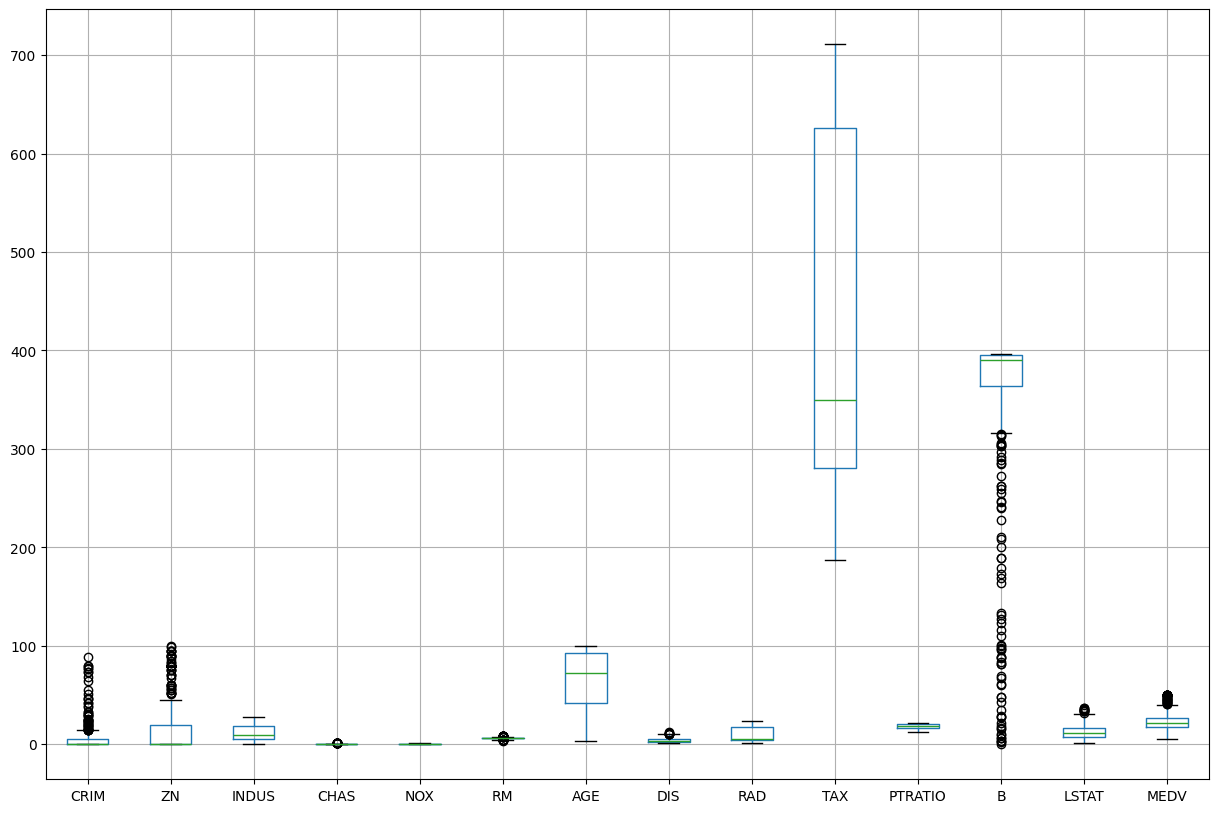

{'CRIM': np.int64(48), 'ZN': np.int64(51), 'INDUS': np.int64(0), 'CHAS': np.int64(34), 'NOX': np.int64(0), 'RM': np.int64(35), 'AGE': np.int64(0), 'DIS': np.int64(8), 'RAD': np.int64(0), 'TAX': np.int64(0), 'PTRATIO': np.int64(0), 'B': np.int64(72), 'LSTAT': np.int64(10), 'MEDV': np.int64(30)}


In [18]:
df_train_imputed.boxplot(figsize=(15, 10))
plt.show()

outliers_por_columna = contar_outliers(df_train_imputed)
print(outliers_por_columna)

Teniendo en cuenta el boxplot, decidimos graficar las variables con mayor cantidad de valores atípicos.

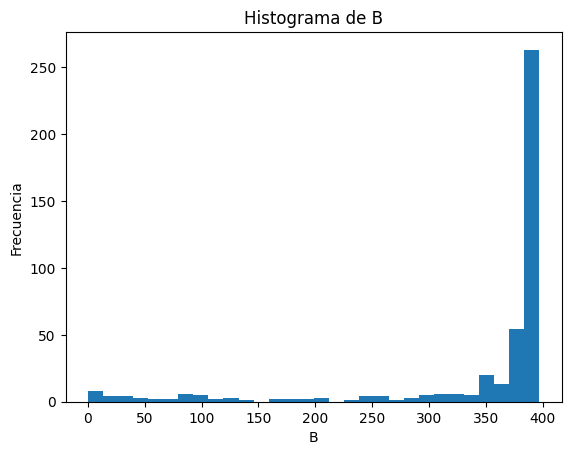

In [19]:
plt.hist(df_train_imputed['B'], bins=30)
plt.xlabel('B')
plt.ylabel('Frecuencia')
plt.title('Histograma de B')
plt.show()

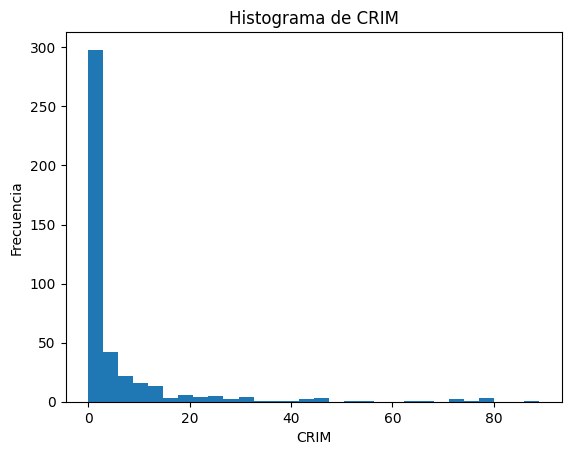

In [20]:
plt.hist(df_train_imputed['CRIM'], bins=30)
plt.xlabel('CRIM')
plt.ylabel('Frecuencia')
plt.title('Histograma de CRIM')
plt.show()

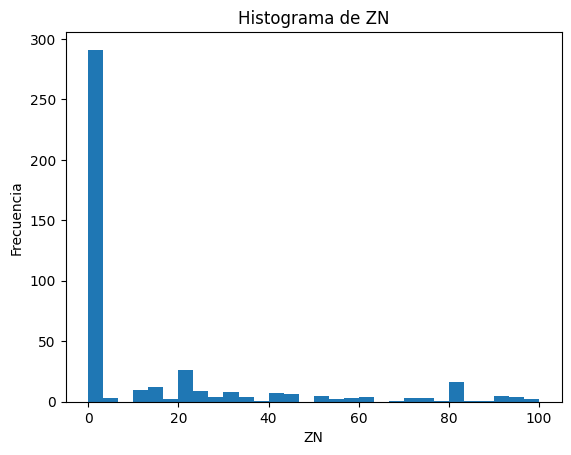

In [21]:
plt.hist(df_train_imputed['ZN'], bins=30)
plt.xlabel('ZN')
plt.ylabel('Frecuencia')
plt.title('Histograma de ZN')
plt.show()

Conclusión: Pudimos observar que estos outliers se deben a una gran asimetría en la distribución de las variables.
De esta manera, decidimos no realizar ningún tratamiento de outliers ya que no lo consideramos necesario. Además, eliminarlos o ajustarlos podría distorsionar la interpretación real de los datos.

## Escalado de datos

Escalamos los datos con el escalado robusto teniendo en cuenta solo las variables cuantitativas continuas

### Para df_train

In [22]:
df_train_escalado = df_train_imputed.drop(columns=['CHAS'])
scaler = RobustScaler()
df_train_escalado = pd.DataFrame(scaler.fit_transform(df_train_escalado), columns=df_train_escalado.columns)

sns.displot(data=df_train_escalado, kind='kde', fill=True)

In [23]:
df_train_escalado['CHAS'] = df_train_imputed['CHAS']

### Para df_test

In [24]:
df_test_escalado = df_test_imputed.drop(columns=['CHAS'])
scaler = RobustScaler()
df_test_escalado = pd.DataFrame(scaler.fit_transform(df_test_escalado), columns=df_test_escalado.columns)
df_test_escalado.head()

sns.displot(data=df_test_escalado, kind='kde', fill=True)

In [25]:
df_test_escalado['CHAS'] = df_test_imputed['CHAS']

# Análisis Descriptivo

## Visualización de datos

### Matriz de correlación

In [26]:
df_train_matriz = df_train_escalado.drop(columns=['CHAS'])
df_train_matriz.head()
corrmat = df_train_matriz.corr()
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5, cmap='coolwarm')

<Axes: >

Dada la matriz de correlación, decidimos observar en detalle con un scatterplot la relación entre las variables que presentan una correlación lineal inversa o directa más fuerte.

### Relación AGE-DIS

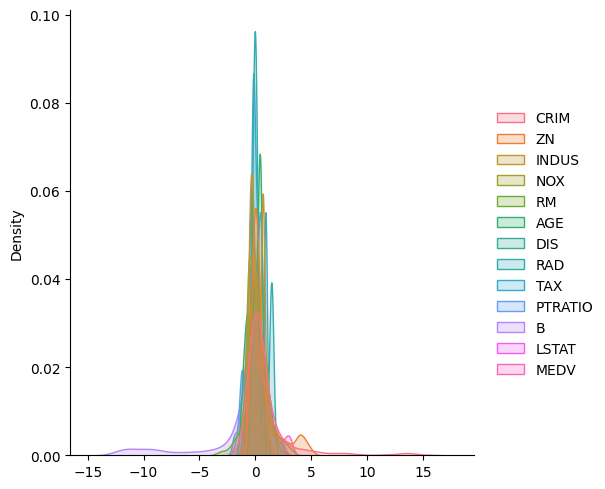

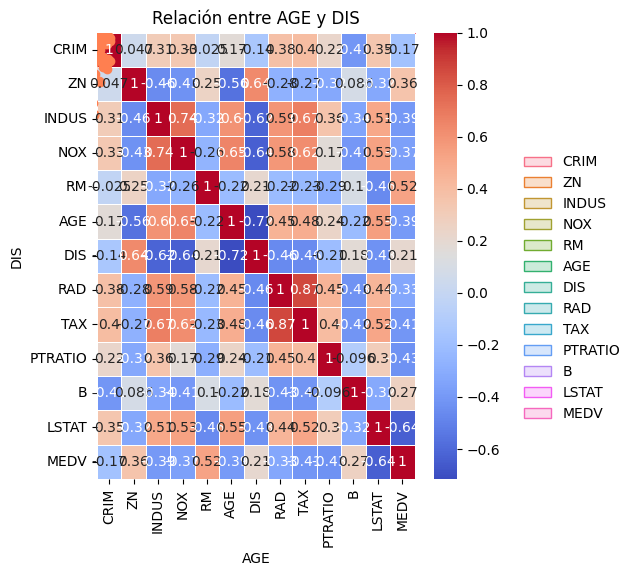

In [27]:
plt.scatter(df_train_escalado['AGE'], df_train_escalado['DIS'], color = 'coral')
plt.xlabel('AGE')
plt.ylabel('DIS')
plt.title('Relación entre AGE y DIS')
plt.show()

Conclusión: el gráfico realizado nos confirma la correlación lineal inversa.
A mayor proporción de unidades ocupadas por sus propietarios construidas antes de 1940, menor distancias ponderadas a cinco centros de empleo de Boston.

### Relación TAX-RAD

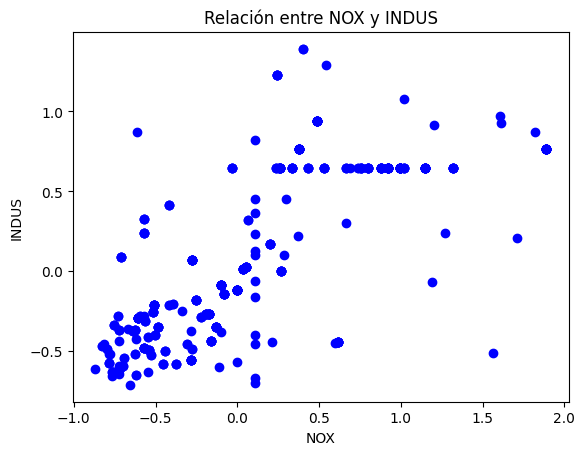

In [28]:
plt.scatter(df_train_escalado['NOX'], df_train_escalado['INDUS'], color = 'blue')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.title('Relación entre NOX y INDUS')
plt.show()

Conclusión: el gráfico realizado confirma la correlación lineal directa.
A mayor concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M], mayor proporción de acres de negocios no minoristas por ciudad.

### Distribución de MEDV

Consideramos necesario realizar un gráfico de distribución de la variable targer 'MEDV', para entender su comportamiento, ver si la variable es simétrica o si presenta algún sesgo.

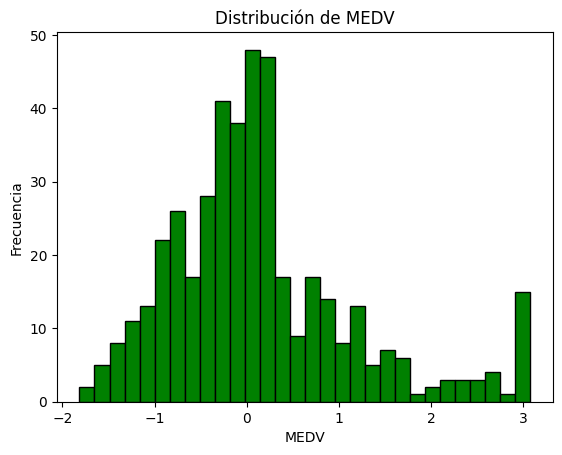

In [29]:
plt.hist(df_train_escalado['MEDV'], bins=30, color='green', edgecolor='black')
plt.xlabel('MEDV')
plt.ylabel('Frecuencia')
plt.title('Distribución de MEDV')
plt.show()

Conclusión: El gráfico nos muestra que, luego de aplicar el escalado robusto, los valores de la variable MEDV están centrados en torno a 0 (por esto mismo es que hay valores negativos). También observamos que la distribución es asimétrica hacia la derecha, con una mayor cantidad de valores a la izquierda de la mediana y una cola larga hacia la derecha.

### Distribución de MEDV según el límite con el ríó Charles

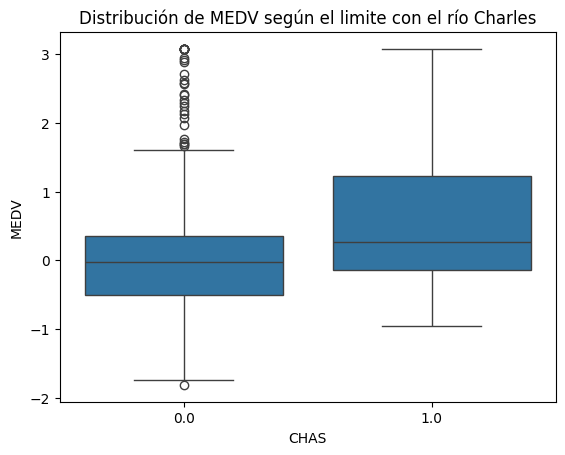

In [30]:
sns.boxplot(x='CHAS', y='MEDV', data=df_train_escalado)
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.title('Distribución de MEDV según el limite con el río Charles')
plt.show()

Conclusión: Podemos observar que las viviendas que no limitan con el río Charles, tienden a tener un valor menor en comparación con las que si limitan con el río.

### Relación MEDV-RM

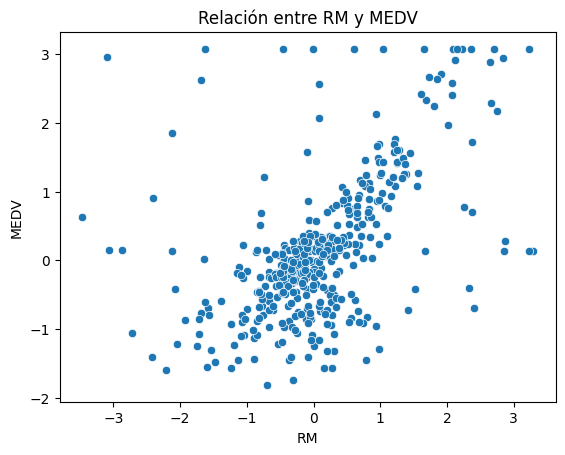

In [31]:
sns.scatterplot(x='RM', y='MEDV', data=df_train_escalado)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Relación entre RM y MEDV')
plt.show()

Conclusión: Vemos que a mayor número de habitaciones por vivienda, mayor es el valor mediano de las viviendas en miles de dólares. Esto indica una correlación lineal directa.

### Relación MEDV-LSTAT

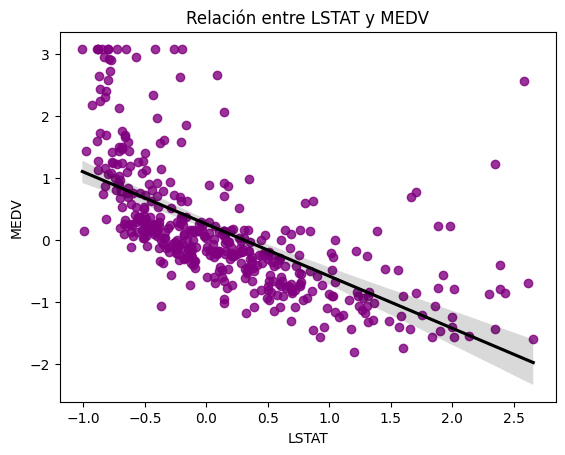

In [32]:
sns.regplot(x='LSTAT', y='MEDV', data=df_train_escalado, scatter_kws={'color':'purple'}, line_kws={'color':'black'})
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Relación entre LSTAT y MEDV')
plt.show()

Conclusión: Contemplamos la correlación lineal inversa. A mayor porcentaje de población de menor estatus socioeconómico, menor valor mediano de las viviendas en miles de dólares.

# Regresión lineal

Elegimos evaluar los diferentes modelos con las siguientes 3 métricas:

- R2: Mide la variabilidad de los datos que explica el modelo. De esta manera, indica que tan bien el modelo ajusta los datos, permitiendo tener una visión global de su capacidad predictiva. Además, es sencilla de interpretar.

- RMSE: Calcula la desviación promedio de las predicciones del modelo respecto a los valores reales. Refleja la magnitud del error en las mismas unidades que la variable objetivo, facilitando la interpretación.

- MAE: Calcula el promedio de las diferencias absolutas entre las predicciones del modelos y los valores reales. Es útil ya que es más robusta ante la presencia de outliers. Además, proporciona una medida de cuanto se desvía el modelo en promedio.


Las métricas se evalúan para ambos conjuntos, tanto de entrenamiento como de testeo, ya que la relación entre estos resultados define el fitting del modelo. Sobre el conjunto de entrenamiento, las métricas muestran qué tan bien el modelo se ajusta a los datos que ha visto. En el conjunto de testeo, las métricas evalúan la capacidad de generalización del modelo, es decir, cómo de bien puede predecir sobre datos no vistos.

Funciones para calcular las métricas de evaluación:

In [33]:
# Función para calcular RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [34]:
# Función para calcular MAE
def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

Volvemos a separar los datos de entrenamiento y testeo, por un lado las variables predictoras (independientes) y por otro la variable a predecir (dependiente).

In [35]:
df_y_train = df_train_escalado['MEDV']
df_y_test = df_test_escalado['MEDV']

df_x_train = df_train_escalado.drop(columns=['MEDV'])
df_x_test = df_test_escalado.drop(columns=['MEDV'])

In [36]:
def evaluate_linear_regression(df_x_train, df_y_train, df_x_test, df_y_test):
    model = LinearRegression()
    model.fit(df_x_train, df_y_train)

    pendiente = model.coef_[0]
    intercepto = model.intercept_
    print(f"Pendiente: {pendiente}")
    print(f"Intercepto: {intercepto}")

    # Calcular R²
    train_score_lr = model.score(df_x_train, df_y_train)
    test_score_lr = model.score(df_x_test, df_y_test)
    print("R² de entrenamiento para el modelo de regresión lineal: {}".format(train_score_lr))
    print("R² de testeo para el modelo de regresión lineal: {}".format(test_score_lr))

    # Predecir en el conjunto de entrenamiento y prueba
    train_pred_lr = model.predict(df_x_train)
    test_pred_lr = model.predict(df_x_test)

    # Calcular RMSE
    train_rmse_lr = np.sqrt(mean_squared_error(df_y_train, train_pred_lr))
    test_rmse_lr = np.sqrt(mean_squared_error(df_y_test, test_pred_lr))
    print("RMSE de entrenamiento para el modelo de regresión lineal: {}".format(train_rmse_lr))
    print("RMSE de testeo para el modelo de regresión lineal: {}".format(test_rmse_lr))

    # Calcular MAE
    train_mae_lr = mean_absolute_error(df_y_train, train_pred_lr)
    test_mae_lr = mean_absolute_error(df_y_test, test_pred_lr)
    print("MAE de entrenamiento para el modelo de regresión lineal: {}".format(train_mae_lr))
    print("MAE de testeo para el modelo de regresión lineal: {}".format(test_mae_lr))

    return {
        'pendiente': pendiente,
        'intercepto': intercepto,
        'train_r2': train_score_lr,
        'test_r2': test_score_lr,
        'train_rmse': train_rmse_lr,
        'test_rmse': test_rmse_lr,
        'train_mae': train_mae_lr,
        'test_mae': test_mae_lr,
        'model': model  # Devolver el modelo para el gráfico de residuos
    }

In [37]:
resultados_lr = evaluate_linear_regression(df_x_train, df_y_train, df_x_test, df_y_test)

Pendiente: 0.007405547303455523
Intercepto: 0.08012270776240314
R² de entrenamiento para el modelo de regresión lineal: 0.6127357053269264
R² de testeo para el modelo de regresión lineal: 0.5725647090893866
RMSE de entrenamiento para el modelo de regresión lineal: 0.6288716744422496
RMSE de testeo para el modelo de regresión lineal: 0.7478800707205621
MAE de entrenamiento para el modelo de regresión lineal: 0.4239913499779362
MAE de testeo para el modelo de regresión lineal: 0.49619289395634697


Conclusión:

- Pendiente (coeficiente): La pendiente obtenida de 0.0074, nos indica que por cada unidad que aumente las variables independientes X, la variable dependiente y se incrementará en aproximadamente 0.0074 unidades.
Observamos que el coeficiente es muy pequeño, por lo tanto el impacto de X en y es leve.

- Intercepto: El intercepto de 0.0801, representa el valor de y cuando todas las variables independientes X valen cero.

##Métodos de Regularización

Para la selección de hiperparámetros, comenzamos con valores iniciales arbitrarios y luego los ajustamos durante la variación de los mismos, buscando los que nos resultaran óptimos para mejorar el rendimiento del modelo.

###Ridge

In [38]:
def ridge_regression_model(alpha, df_x_train, df_y_train, df_x_test, df_y_test):
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(df_x_train, df_y_train)

    # Calcular R²
    train_score_ridge = ridgeReg.score(df_x_train, df_y_train)
    test_score_ridge = ridgeReg.score(df_x_test, df_y_test)
    print("R2 de entrenamiento para el modelo de regresión lineal con ridge: {}".format(train_score_ridge))
    print("R2 de testeo para el modelo de regresión lineal con ridge: {}".format(test_score_ridge))

    # Predecir en el conjunto de entrenamiento y prueba
    train_pred_ridge = ridgeReg.predict(df_x_train)
    test_pred_ridge = ridgeReg.predict(df_x_test)

    # Calcular RMSE
    train_rmse_ridge = calculate_rmse(df_y_train, train_pred_ridge)
    test_rmse_ridge = calculate_rmse(df_y_test, test_pred_ridge)
    print("RMSE de entrenamiento para el modelo de regresión lineal con ridge: {}".format(train_rmse_ridge))
    print("RMSE de testeo para el modelo de regresión lineal con ridge: {}".format(test_rmse_ridge))

    # Calcular MAE
    train_mae_ridge = calculate_mae(df_y_train, train_pred_ridge)
    test_mae_ridge = calculate_mae(df_y_test, test_pred_ridge)
    print("MAE de entrenamiento para el modelo de regresión lineal con ridge: {}".format(train_mae_ridge))
    print("MAE de testeo para el modelo de regresión lineal con ridge: {}".format(test_mae_ridge))

    return {
        'train_r2': train_score_ridge,
        'test_r2': test_score_ridge,
        'train_rmse': train_rmse_ridge,
        'test_rmse': test_rmse_ridge,
        'train_mae': train_mae_ridge,
        'test_mae': test_mae_ridge
    }

In [39]:
ridge_regression_model(100, df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con ridge: 0.5589348092669364
R2 de testeo para el modelo de regresión lineal con ridge: 0.5735757478191268
RMSE de entrenamiento para el modelo de regresión lineal con ridge: 0.6711347049742324
RMSE de testeo para el modelo de regresión lineal con ridge: 0.746995043915506
MAE de entrenamiento para el modelo de regresión lineal con ridge: 0.4444614809504008
MAE de testeo para el modelo de regresión lineal con ridge: 0.498682810212624


{'train_r2': 0.5589348092669364,
 'test_r2': 0.5735757478191268,
 'train_rmse': np.float64(0.6711347049742324),
 'test_rmse': np.float64(0.746995043915506),
 'train_mae': np.float64(0.4444614809504008),
 'test_mae': np.float64(0.498682810212624)}

Conclusión General:

1.
El R² en el conjunto de entrenamiento es 0.5589, es decir que el modelo explica el 55.89% de la variabilidad de los datos. Mientras que en el conjunto de testeo, el R² es de 0.5736, explicando el 57.36% de la variabilidad de los datos de prueba.
Aunque ambos valores no son muy altos, son bastante cercanos, por lo cual sabemos que el modelo no está sobreajustado ni subajustado significativamente.

2.
En el conjunto de entrenamiento, el error promedio es de 0.6711.
En el conjunto de testeo, el error es de 0.7470, por lo que el modelo tiene un mejor rendimiento en los datos de entrenamiento, esto indica que el modelo generaliza relativamente bien.

3.
En el conjunto de entrenamiento, el MAE es 0.4445, y en el conjunto de testeo, es de 0.4987, lo que nos indica que el modelo tiene una precisión razonable y no está sufriendo de sobreajuste.

####Variación de Hiperparámetros

In [40]:
resultados_ridge = ridge_regression_model(5, df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con ridge: 0.6117634332521323
R2 de testeo para el modelo de regresión lineal con ridge: 0.5746000083348106
RMSE de entrenamiento para el modelo de regresión lineal con ridge: 0.6296606073335675
RMSE de testeo para el modelo de regresión lineal con ridge: 0.7460973727277752
MAE de entrenamiento para el modelo de regresión lineal con ridge: 0.4227111503327649
MAE de testeo para el modelo de regresión lineal con ridge: 0.49248999175732716


Conclusión luego del ajuste:

- R²: El coeficiente de determinación (R²) para el conjunto de entrenamiento mejoró en comparación con el modelo anterior, pasando de 0.5589 a 0.6118. El modelo ahora explica el 61.18% de la variabilidad en los datos de entrenamiento, lo que indica una mejora en el ajuste del modelo. En el conjunto de testeo, el R² se mantiene similar, el modelo sigue explicando el 57.46% de la variabilidad en los datos de prueba.

- RMSE: El error cuadrático medio (RMSE) en el conjunto de entrenamiento es de 0.6297, lo que representa una mejora con respecto al RMSE previo de 0.6711. En el conjunto de testeo, el RMSE es de 0.7461, similar al valor previo de 0.7470. El modelo tiene una buena capacidad de generalización.

- MAE: El error absoluto medio (MAE) en el conjunto de entrenamiento mejoró, pasando de 0.4445 a 0.4227. Este menor valor de MAE en entrenamiento muestra que el modelo es más preciso en sus predicciones.

El ajuste de hiperparámetros con Ridge mejoró el modelo sin caer en sobreajuste.

###Lasso

In [41]:
def lasso_regression_model(alpha, df_x_train, df_y_train, df_x_test, df_y_test):
    lasso = Lasso(alpha=alpha)
    lasso.fit(df_x_train, df_y_train)

    # Calcular R²
    train_score_ls = lasso.score(df_x_train, df_y_train)
    test_score_ls = lasso.score(df_x_test, df_y_test)
    print("R2 de entrenamiento para el modelo de regresión lineal con lasso: {}".format(train_score_ls))
    print("R2 de testeo para el modelo de regresión lineal con lasso: {}".format(test_score_ls))

    # Predecir en el conjunto de entrenamiento y prueba
    train_pred_lasso = lasso.predict(df_x_train)
    test_pred_lasso = lasso.predict(df_x_test)

    # Calcular RMSE
    train_rmse_lasso = calculate_rmse(df_y_train, train_pred_lasso)
    test_rmse_lasso = calculate_rmse(df_y_test, test_pred_lasso)
    print("RMSE de entrenamiento para el modelo de regresión lineal con lasso: {}".format(train_rmse_lasso))
    print("RMSE de testeo para el modelo de regresión lineal con lasso: {}".format(test_rmse_lasso))

    # Calcular MAE
    train_mae_lasso = calculate_mae(df_y_train, train_pred_lasso)
    test_mae_lasso = calculate_mae(df_y_test, test_pred_lasso)
    print("MAE de entrenamiento para el modelo de regresión lineal con lasso: {}".format(train_mae_lasso))
    print("MAE de testeo para el modelo de regresión lineal con lasso: {}".format(test_mae_lasso))

    return {
        'train_r2': train_score_ls,
        'test_r2': test_score_ls,
        'train_rmse': train_rmse_lasso,
        'test_rmse': test_rmse_lasso,
        'train_mae': train_mae_lasso,
        'test_mae': test_mae_lasso
    }

In [42]:
lasso_regression_model(0.01, df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con lasso: 0.6047711842130581
R2 de testeo para el modelo de regresión lineal con lasso: 0.563610435560115
RMSE de entrenamiento para el modelo de regresión lineal con lasso: 0.6353054860248023
RMSE de testeo para el modelo de regresión lineal con lasso: 0.7556730786198831
MAE de entrenamiento para el modelo de regresión lineal con lasso: 0.42887086563072824
MAE de testeo para el modelo de regresión lineal con lasso: 0.5052050526597966


{'train_r2': 0.6047711842130581,
 'test_r2': 0.563610435560115,
 'train_rmse': np.float64(0.6353054860248023),
 'test_rmse': np.float64(0.7556730786198831),
 'train_mae': np.float64(0.42887086563072824),
 'test_mae': np.float64(0.5052050526597966)}

Conclusión General:


1.
En el conjunto de entrenamiento, el modelo explica el 60.48% de la variabilidad en los datos, y en el de testeo, explica el 56.36%.
Al ser valores relativamente cercanos, el modelo no está sobreajustado.


2.
En el conjunto de entrenamiento, el error promedio es de 0.6353, mientras que en el de testeo, el error es mayor, llegando a 0.7557.
Esto indica que el modelo es menos preciso en los datos no vistos, por lo tanto no está generalizando bien.

3.
En el conjunto de entrenamiento, el MAE es 0.4289, en el de testeo, es de 0.5052, a pesar de esta pequeña diferencia, interpretamos que el modelo mantiene un rendimiento razonable en datos no vistos.


####Variación de Hiperparámetros

In [43]:
resultados_lasso = lasso_regression_model(0.000001, df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con lasso: 0.6127357052085698
R2 de testeo para el modelo de regresión lineal con lasso: 0.5725634911427655
RMSE de entrenamiento para el modelo de regresión lineal con lasso: 0.6288716745383481
RMSE de testeo para el modelo de regresión lineal con lasso: 0.7478811362354781
MAE de entrenamiento para el modelo de regresión lineal con lasso: 0.42399069453367594
MAE de testeo para el modelo de regresión lineal con lasso: 0.49619386662918685


Conclusión luego del ajuste:

- R² El coeficiente de determinación (R²):  tiene un rendimiento ligeramente mejor en entrenamiento (61.27% vs. 60.48%) y en testeo (57.26% vs. 56.36%). Esto significa que el modelo captura más variabilidad de los datos.

- RMSE (Error cuadrático medio): El modelo redujo el error cuadrático medio tanto en el conjunto de entrenamiento (0.6289 vs. 0.6353) como en el de testeo (0.7479 vs. 0.7557). Esto indica que mejoró la precisión del modelo, reduciendo los errores en ambos conjuntos de datos.

- MAE (Error absoluto medio): mejora el MAE en ambos conjuntos, el error disminuye poco en el entrenamiento (0.4240 vs. 0.4289) y de forma más significativa en el testeo (0.4962 vs. 0.5052). Esto implica que el modelo tiene una mayor precisión y estabilidad al predecir datos no vistos.

Se consiguió un mejor ajuste del modelo sin caer en el sobreajuste, al mismo tiempo que se mejoró su capacidad de generalización y precisión.

###Elastic Net

In [44]:
def elastic_net_regression_model(df_x_train, df_y_train, df_x_test, df_y_test):
    elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
    elastic.fit(df_x_train, df_y_train)

    # Calcular R²
    train_score_en = elastic.score(df_x_train, df_y_train)
    test_score_en = elastic.score(df_x_test, df_y_test)
    print("R2 de entrenamiento para el modelo de regresión lineal con elastic net: {}".format(train_score_en))
    print("R2 de testeo para el modelo de regresión lineal con elastic net: {}".format(test_score_en))

    # Predecir en el conjunto de entrenamiento y prueba
    train_pred_elastic = elastic.predict(df_x_train)
    test_pred_elastic = elastic.predict(df_x_test)

    # Calcular RMSE
    train_rmse_elastic = calculate_rmse(df_y_train, train_pred_elastic)
    test_rmse_elastic = calculate_rmse(df_y_test, test_pred_elastic)
    print("RMSE de entrenamiento para el modelo de regresión lineal con elastic net: {}".format(train_rmse_elastic))
    print("RMSE de testeo para el modelo de regresión lineal con elastic net: {}".format(test_rmse_elastic))

    # Calcular MAE
    train_mae_elastic = calculate_mae(df_y_train, train_pred_elastic)
    test_mae_elastic = calculate_mae(df_y_test, test_pred_elastic)
    print("MAE de entrenamiento para el modelo de regresión lineal con elastic net: {}".format(train_mae_elastic))
    print("MAE de testeo para el modelo de regresión lineal con elastic net: {}".format(test_mae_elastic))

    return {
        'train_r2': train_score_en,
        'test_r2': test_score_en,
        'train_rmse': train_rmse_elastic,
        'test_rmse': test_rmse_elastic,
        'train_mae': train_mae_elastic,
        'test_mae': test_mae_elastic
    }

In [45]:
resultados_elastic = elastic_net_regression_model(df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con elastic net: 0.6097473523131994
R2 de testeo para el modelo de regresión lineal con elastic net: 0.5714114586242287
RMSE de entrenamiento para el modelo de regresión lineal con elastic net: 0.6312933785467832
RMSE de testeo para el modelo de regresión lineal con elastic net: 0.7488883076099321
MAE de entrenamiento para el modelo de regresión lineal con elastic net: 0.42428119490758076
MAE de testeo para el modelo de regresión lineal con elastic net: 0.49588814459271763


Conclusión General:

1.
El R² en el conjunto de entrenamiento es 0.6097, por lo tanto el modelo explica el 60.97% de la variabilidad de los datos. En el de testeo, el R² es de 0.5714, por lo que observamos que el modelo también generaliza bien, explicando el 57.14%.
De esta manera, el modelo no está sobreajustado ni subajustado.

2.
En el conjunto de entrenamiento, el RMSE es 0.6313, en el de testeo, el RMSE es 0.7489, indicando que el error aumenta ligeramente cuando se evalúa en datos no vistos.

3.
En el conjunto de entrenamiento, el MAE es 0.4243, mientras que en el de testeo, el MAE es 0.4959, lo que representa un aumento leve en los datos de prueba. Vemos así que el modelo mantiene un rendimiento consistente en términos de precisión, incluso en datos no vistos.

###Gráfico de residuos

El gráfico de residuos ayuda a verificar si el modelo cumple con los supuestos de regresión lineal:

- No hay patrones evidentes: Si los residuos están distribuidos aleatoriamente, sin patrones evidentes, significa que el modelo está ajustando bien los datos.
- Residuos alrededor de 0: Si los residuos están distribuidos alrededor de 0, esto es un buen indicio de que el modelo está haciendo buenas predicciones.

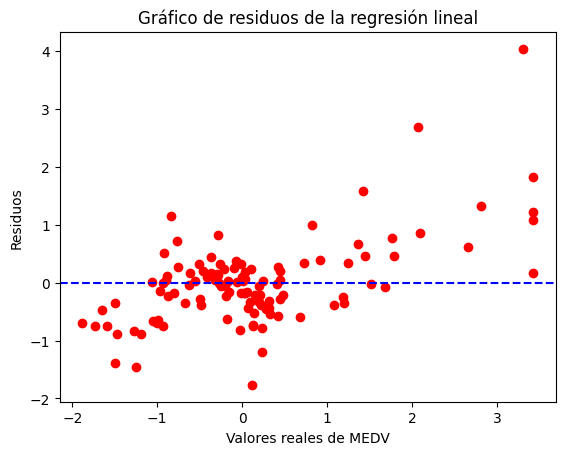

In [46]:
model = resultados_lr['model']
y_pred = model.predict(df_x_test)

residuos = df_y_test - y_pred

plt.scatter(df_y_test, residuos, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Valores reales de MEDV')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos de la regresión lineal')
plt.show()

Conclusión: No observamos patrones evidentes y notamos que los residuos están distribuidos aleatoriamente alrededor del cero.

##Gradiente Descendiente

Tanto para GRADIENTE DESCENDIENTE, ESTOCÁSTICO COMO MINIBATCH:

Para la selección de hiperparámetros, comenzamos con valores iniciales arbitrarios y luego los ajustamos durante la variación de los mismos, buscando los que nos resultaran óptimos para mejorar el rendimiento del modelo.

Las conclusiones se basan en los valores aproximados obtenidos en una ejecución. Sin embargo, los resultados pueden variar entre ejecuciones, ya que los pesos iniciales
de W se inicializan de manera aleatoria en cada ejecución.

In [47]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100, alpha=0.01):
    n = X_train.shape[0]
    m = X_train.shape[1]
    o = X_val.shape[0]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento
    test_errors = []   # Para almacenar el error de prueba

    for _ in range(epochs):
        # Predicción y error en el conjunto de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Predicción y error en el conjunto de validación
        prediction_test = np.matmul(X_val, W)
        error_test = y_val - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar los pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    final_train_pred = np.matmul(X_train, W)
    final_test_pred = np.matmul(X_val, W)

    train_r2 = r2_score(y_train, final_train_pred)
    test_r2 = r2_score(y_val, final_test_pred)
    print("R^2 de entrenamiento:", train_r2)
    print("R^2 de testeo:", test_r2)

    train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_val, final_test_pred))
    print("RMSE de entrenamiento:", train_rmse)
    print("RMSE de testeo:", test_rmse)

    train_mae = mean_absolute_error(y_train, final_train_pred)
    test_mae = mean_absolute_error(y_val, final_test_pred)
    print("MAE de entrenamiento:", train_mae)
    print("MAE de testeo:", test_mae)

    # Graficar errores de entrenamiento y prueba
    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de validación')
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y validación vs iteraciones (GD)')
    plt.show()

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

In [48]:
X_train, X_val, y_train, y_val = train_test_split(df_x_train, df_y_train, test_size=0.125, random_state=42)

In [49]:
X_test.shape, X_train.shape, X_val.shape, y_test.shape, y_train.shape, y_val.shape

((112, 13), (379, 13), (55, 13), (112,), (379,), (55,))

In [50]:
# Convertimos la serie de pandas a un array de NumPy bidimensional
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)

Convertimos y_train (379,) e y_val (55,) (son vectores unidimensionales), asegurandonos de que tengan una forma bidimensional (379, 1) y (55, 1) para que puedan multiplicarse correctamente con X_train y X_val dentro de la función de descenso de gradiente.

R^2 de entrenamiento: -0.9371862211633144
R^2 de testeo: -0.3524328433768946
RMSE de entrenamiento: 1.387168689976515
RMSE de testeo: 1.2663266641496276
MAE de entrenamiento: 1.0806433963970503
MAE de testeo: 0.9699169536288287


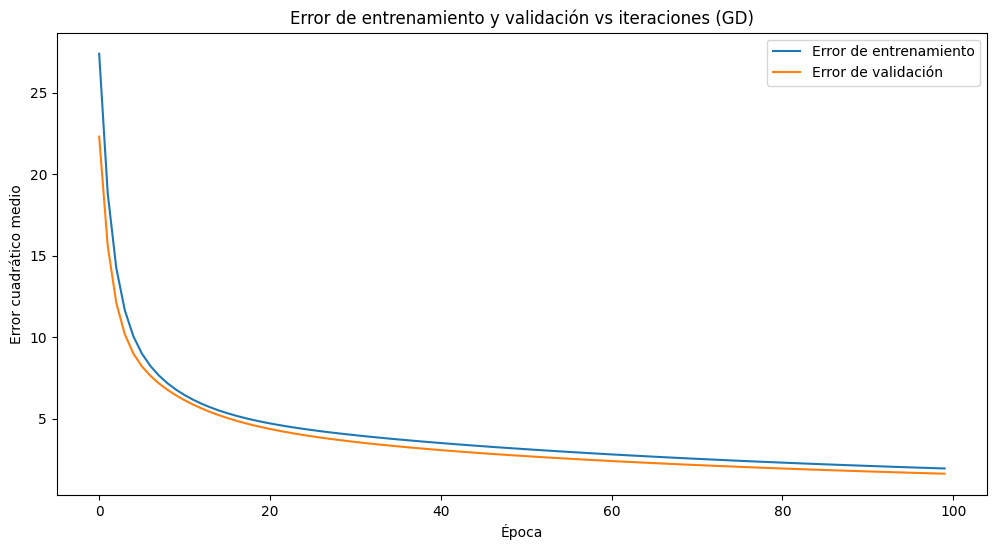

{'train_r2': -0.9371862211633144,
 'test_r2': -0.3524328433768946,
 'train_rmse': np.float64(1.387168689976515),
 'test_rmse': np.float64(1.2663266641496276),
 'train_mae': np.float64(1.0806433963970503),
 'test_mae': np.float64(0.9699169536288287)}

In [51]:
gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100)

Conclusión: A medida que aumentan las iteraciones, disminuye el error cuadrático medio. Dado que las curvas muestran una tendencia decreciente, el modelo está mejorando a medida que el algoritmo optimiza los pesos durante las iteraciones.

No hay gran diferencia entre el error de entrenamiento y el de validación, lo que significa que el modelo no está sobreajustando (overfitting) ni subajustando (underfitting).

RMSE y MAE de entrenamiento: Los valores son más altos en el entrenamiento comparados con los de testeo (0.974 vs. 0.824 para RMSE y 0.687 vs. 0.651 para MAE).
RMSE y MAE de testeo: Los valores más bajos en el testeo nos muestra que el modelo está generalizando bien a nuevos datos.

R² de entrenamiento (0.046): Es bastante bajo, demostrando que el modelo explica muy poca variabilidad en el conjunto de entrenamiento.
R² de testeo (0.427): Es significativamente más alto que el de entrenamiento, lo cual es inusual. El modelo podría estar bajoajustado.

### Variación de Hiperparámetros


R^2 de entrenamiento: 0.34744445641930954
R^2 de testeo: 0.50707795243054
RMSE de entrenamiento: 0.8051046477334798
RMSE de testeo: 0.7644991714502649
MAE de entrenamiento: 0.5793571284741079
MAE de testeo: 0.5708313167055206


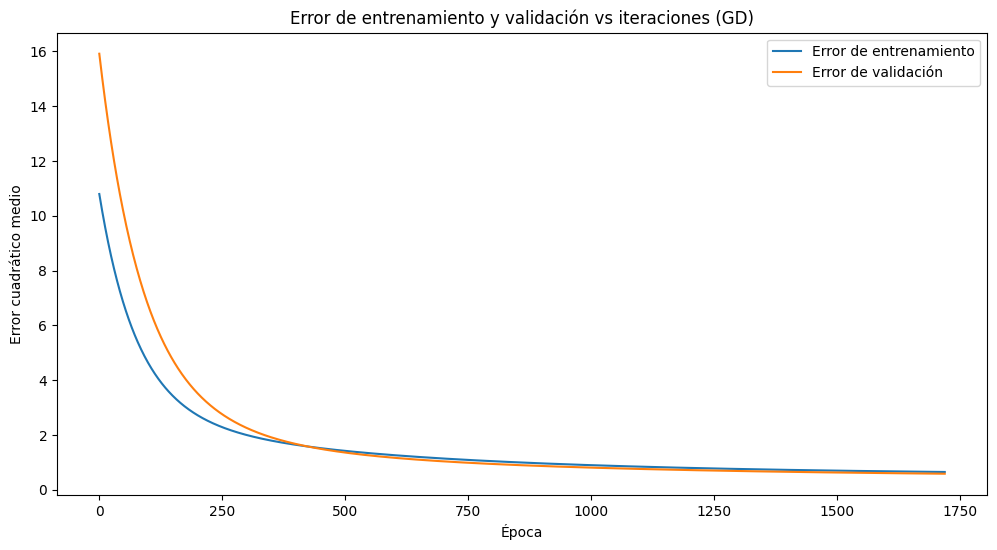

In [52]:
resultados_gradiente = gradient_descent(X_train, y_train, X_val, y_val, lr=0.001, epochs=1720)

Conclusión:

Luego de conseguir mejoras en los resultados concluimos que:

Error Cuadrático Medio (RMSE):

- Entrenamiento: 0.872

- Testeo: 0.776

El error en el conjunto de entrenamiento mejoró, y el error en el conjunto de testeo sigue siendo bajo. Ambos valores resultan un mejor ajuste del modelo.

Error Absoluto Medio (MAE):

- Entrenamiento: 0.643

- Testeo: 0.632

Ambos valores de MAE son bastante similares, y El MAE ligeramente más bajo en testeo afirma una buena generalización del modelo.

Coeficiente de Determinación (R²):

- Entrenamiento (0.234): El valor de R² mejoró notablemente en comparación con la primera llamada a la función, por lo que el modelo ahora explica más la variabilidad en los datos, aunque sigue siendo bajo.

- Testeo (0.493): También mejoró el R² del conjunto de testeo. Muestra que el modelo puede explicar casi el 50% de la variabilidad de los datos.



Respecto al gráfico: Ambos errores disminuyen hasta estabilizarse, lo cual muestra que el modelo aprendió bien sin sobreajustarse.

## Gradiente Descendiente Estocástico

In [53]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

    final_train_pred = np.matmul(X_train, W)
    final_test_pred = np.matmul(X_test, W)

    train_r2 = r2_score(y_train, final_train_pred)
    test_r2 = r2_score(y_test, final_test_pred)
    print("R^2 de entrenamiento:", train_r2)
    print("R^2 de testeo:", test_r2)

    train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, final_test_pred))
    print("RMSE de entrenamiento:", train_rmse)
    print("RMSE de testeo:", test_rmse)

    train_mae = mean_absolute_error(y_train, final_train_pred)
    test_mae = mean_absolute_error(y_test, final_test_pred)
    print("MAE de entrenamiento:", train_mae)
    print("MAE de testeo:", test_mae)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

R^2 de entrenamiento: 0.5213401288944493
R^2 de testeo: 0.712405954843834
RMSE de entrenamiento: 0.6895362486540338
RMSE de testeo: 0.5839529299887145
MAE de entrenamiento: 0.4778988114135841
MAE de testeo: 0.4446230908196896


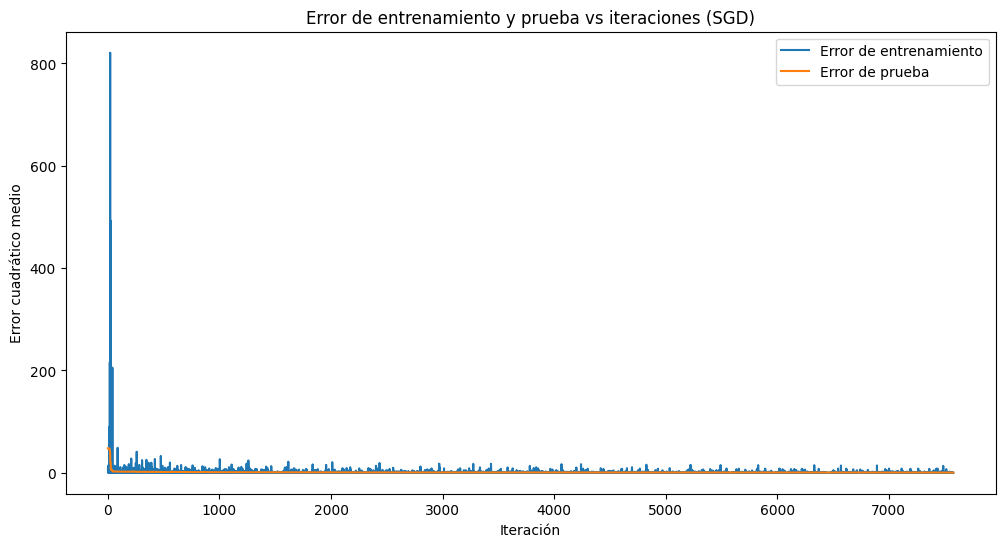

{'train_r2': 0.5213401288944493,
 'test_r2': 0.712405954843834,
 'train_rmse': np.float64(0.6895362486540338),
 'test_rmse': np.float64(0.5839529299887145),
 'train_mae': np.float64(0.4778988114135841),
 'test_mae': np.float64(0.4446230908196896)}

In [54]:
stochastic_gradient_descent(X_train, y_train, X_val, y_val, lr=0.001, epochs=20)

Conclusión:

Coeficiente de Determinación (R²):

- Entrenamiento: El modelo está explicando el 52.9% de la variabilidad en los datos.

- Testeo: El modelo está explicando el 60.6%, lo cual es razonablemente bueno, indicando que el modelo está generalizando bien.

Error Cuadrático Medio (RMSE):

- Entrenamiento (0.684): Este valor es relativamente bajo, lo que significa que el error promedio en el conjunto de entrenamiento es aceptable.

- Testeo (0.683): Es casi idéntico al del entrenamiento. Esto muestra un buen equilibrio entre el entrenamiento y la generalización, indicando un modelo bien ajustado.

Error Absoluto Medio (MAE):

- Entrenamiento (0.4732): El MAE es bajo, lo que significa que el error es aceptable.

- Testeo (0.5330): El MAE en el conjunto de testeo es un poco más alto que en el entrenamiento, pero sigue siendo razonable.

### Variación de Hiperparámetros


R^2 de entrenamiento: 0.5847569413174677
R^2 de testeo: 0.6980797111638339
RMSE de entrenamiento: 0.6422362023221792
RMSE de testeo: 0.5983207247677442
MAE de entrenamiento: 0.42955138298238305
MAE de testeo: 0.4666207971431895


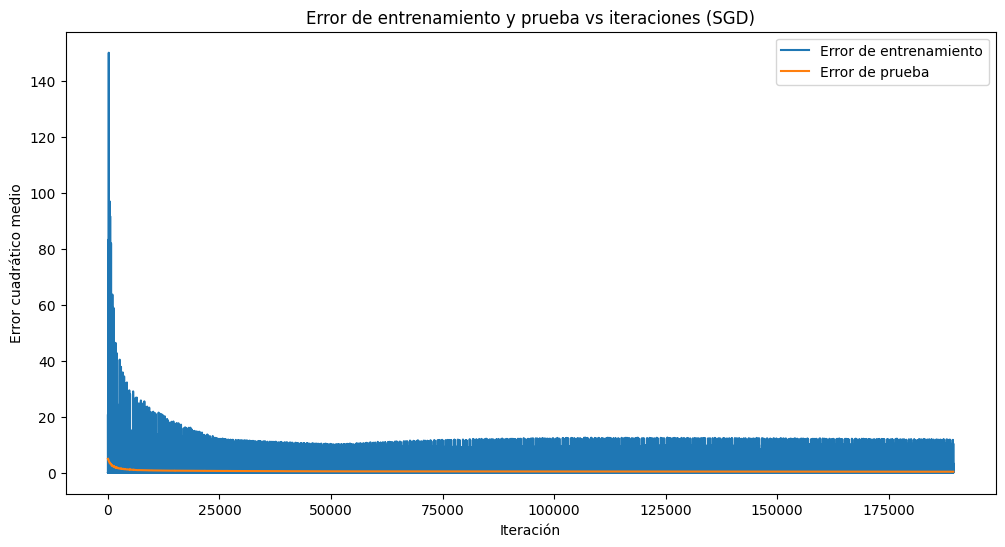

In [55]:
resultados_estocastico = stochastic_gradient_descent(X_train, y_train, X_val, y_val, lr=0.0001, epochs=500)

Conclusión:

Coeficiente de Determinación (R²):

- Entrenamiento (0.589): El modelo está explicando un 58.9% de la variabilidad de los datos, un resultado bastante bueno.

- Testeo (0.706): Indica que el modelo captura más del 70% de la variabilidad en los datos demostrando una buena capacidad de generalización.

Error Cuadrático Medio (RMSE):

- Entrenamiento (0.639) y Testeo (0.590): Los valores de RMSE disminuyeron considerablemente, lo que implica que el modelo está realizando predicciones precisas.

Error Absoluto Medio (MAE):

- Entrenamiento (0.425) y Testeo (0.463): El MAE también es bajo en ambos conjuntos, lo que significa que, el modelo es muy aceptable.

El modelo parece estar balanceado, ya que los errores de entrenamiento y testeo son bastante similares, por lo tanto está bien ajustado.

## Gradiente Descendiente por minibatch

In [56]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.001, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

       # Calcular métricas
    final_train_pred = np.matmul(X_train, W)
    final_test_pred = np.matmul(X_test, W)

    train_r2 = r2_score(y_train, final_train_pred)
    test_r2 = r2_score(y_test, final_test_pred)
    print("R^2 de entrenamiento:", train_r2)
    print("R^2 de testeo:", test_r2)

    train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, final_test_pred))
    print("RMSE de entrenamiento:", train_rmse)
    print("RMSE de testeo:", test_rmse)

    train_mae = mean_absolute_error(y_train, final_train_pred)
    test_mae = mean_absolute_error(y_test, final_test_pred)
    print("MAE de entrenamiento:", train_mae)
    print("MAE de testeo:", test_mae)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

In [57]:
y_train = df_y_train.values.reshape(-1, 1)
df_y_test = df_y_test.values.reshape(-1, 1)

R^2 de entrenamiento: 0.024431988971548968
R^2 de testeo: -0.10770742664354072
RMSE de entrenamiento: 1.007163160592823
RMSE de testeo: 1.2039523697468635
MAE de entrenamiento: 0.7387441951398184
MAE de testeo: 0.8311499985593661


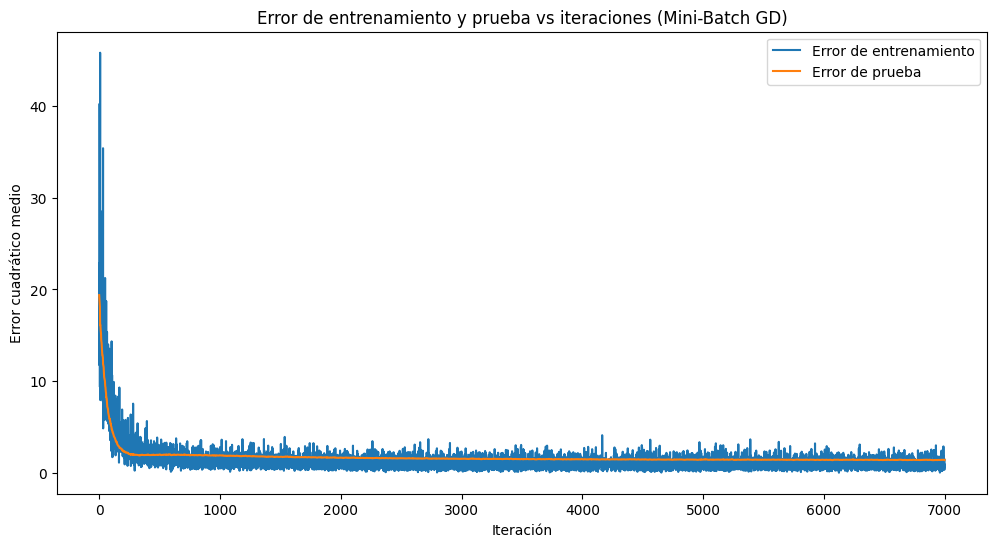

{'train_r2': 0.024431988971548968,
 'test_r2': -0.10770742664354072,
 'train_rmse': np.float64(1.007163160592823),
 'test_rmse': np.float64(1.2039523697468635),
 'train_mae': np.float64(0.7387441951398184),
 'test_mae': np.float64(0.8311499985593661)}

In [58]:
mini_batch_gradient_descent(X_train, y_train, df_x_test, df_y_test, lr=0.001, epochs=200, batch_size=11)

Conclusión:

Coeficiente de Determinación (R²):

- Entrenamiento (0.565): El modelo está explicando el 56.5% de la variabilidad en los datos, buen nivel de ajuste.

- Testeo (0.610): El modelo está generalizando bastante bien, explicando el 61% de la variabilidad en los datos de prueba.

Error Cuadrático Medio (RMSE):

- Entrenamiento (0.658) y Testeo (0.715): Estos valores son bastante bajos y cercanos entre sí, por lo que el modelo está realizando predicciones con un error relativamente bajo.

Error Absoluto Medio (MAE):

- Entrenamiento (0.436) y Testeo (0.492): El MAE también es bajo, lo que significa que, el modelo es bueno.

Buen ajuste y generalización, con errores relativamente bajos, el modelo está aprendiendo bien.

### Variación de Hiperparámetros


R^2 de entrenamiento: 0.038040511668479327
R^2 de testeo: -0.02464770083946921
RMSE de entrenamiento: 1.000113864040056
RMSE de testeo: 1.1579346691134218
MAE de entrenamiento: 0.7334172939266808
MAE de testeo: 0.7959882253911514


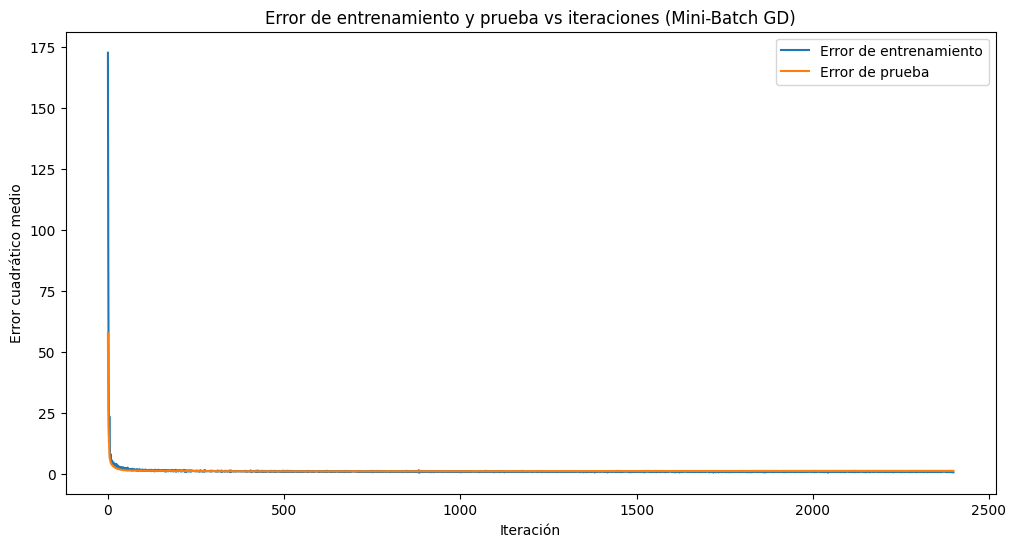

In [59]:
resultados_minibatch = mini_batch_gradient_descent(X_train, y_train, df_x_test, df_y_test, lr=0.01, epochs=800, batch_size=128)

Conclusión:

Coeficiente de Determinación (R²):

- Entrenamiento: 0.5880

- Testeo: 0.5749

El valor de R² mejoró un poco en el conjunto de entrenamiento, lo que indica un mejor ajuste a los datos de entrenamiento. Disminuyó un poco en el conjunto de testeo, lo cual esta indicando una pequeña pérdida de capacidad de generalización.

Error Cuadrático Medio (RMSE):

- Entrenamiento: 0.6397

- Testeo: 0.7458

El RMSE mejoró en el conjunto de entrenamiento, lo que significa que el error promedio disminuyó ligeramente, pero en el conjunto de testeo ha empeorado un poco, lo indica que las predicciones en los datos de prueba son menos precisas.

Error Absoluto Medio (MAE):

- Entrenamiento: 0.4256

- Testeo: 0.4864

El MAE ha mejorado un poco tanto en el conjunto de entrenamiento como en el de testeo, lo que indica que las predicciones del modelo son un poco más precisas.

El nuevo modelo mejoró el ajuste a los datos de entrenamiento, como lo indican el aumento de R² y la disminución de RMSE y MAE.

Sin embargo, el rendimiento en el conjunto de testeo empeoró ligeramente, como lo indica la disminución en R² y el aumento en RMSE. Puede ser una señal de que el modelo ha empezado a sobreajustarse capturando mas ruido.

# Conclusiones generales del Trabajo Práctico

In [60]:
modelos = ['Regresión Lineal', 'Ridge', 'Lasso', 'Elastic Net', 'Gradiente Descendiente', 'Gradiente Estocástico', 'Mini-Batch GD']
metricas = ['R^2 Train', 'R^2 Test', 'RMSE Train', 'RMSE Test', 'MAE Train', 'MAE Test']

df_resultados = pd.DataFrame(index=modelos, columns=metricas)

In [61]:
modelos_resultados = {
    'Ridge': resultados_ridge,
    'Lasso': resultados_lasso,
    'Elastic Net': resultados_elastic,
    'Gradiente Descendiente': resultados_gradiente,
    'Gradiente Estocástico': resultados_estocastico,
    'Mini-Batch GD': resultados_minibatch,
    'Regresión Lineal': resultados_lr
}

for modelo, resultados in modelos_resultados.items():
    df_resultados.loc[modelo, 'R^2 Train'] = resultados['train_r2']
    df_resultados.loc[modelo, 'R^2 Test'] = resultados['test_r2']
    df_resultados.loc[modelo, 'RMSE Train'] = resultados['train_rmse']
    df_resultados.loc[modelo, 'RMSE Test'] = resultados['test_rmse']
    df_resultados.loc[modelo, 'MAE Train'] = resultados['train_mae']
    df_resultados.loc[modelo, 'MAE Test'] = resultados['test_mae']

In [62]:
df_resultados.head(10)

,R^2 Train,R^2 Test,RMSE Train,RMSE Test,MAE Train,MAE Test
Regresión Lineal,0.612736,0.572565,0.628872,0.74788,0.423991,0.496193
Ridge,0.611763,0.5746,0.629661,0.746097,0.422711,0.49249
Lasso,0.612736,0.572563,0.628872,0.747881,0.423991,0.496194
Elastic Net,0.609747,0.571411,0.631293,0.748888,0.424281,0.495888
Gradiente Descendiente,0.347444,0.507078,0.805105,0.764499,0.579357,0.570831
Gradiente Estocástico,0.584757,0.69808,0.642236,0.598321,0.429551,0.466621
Mini-Batch GD,0.038041,-0.024648,1.000114,1.157935,0.733417,0.795988


Comparación por Métricas:

  R² Train y R² Test:

    Mejor modelo: Gradiente Estocástico (0.585253 en R² Train y 0.729467 en R² Test).

    Peor modelo: Mini-Batch GD (0.040008 en R² Train y -0.054826 en R² Test).

RMSE Train y RMSE Test:

    Mejor modelo: Gradiente Estocástico (0.641853 en RMSE Train y 0.566367 en RMSE Test).

    Peor modelo: Mini-Batch GD (0.99909 en RMSE Train y 1.174863 en RMSE Test).
MAE Train y MAE Test:

    Mejor modelo: Gradiente Estocástico (0.426057 en MAE Train y 0.445010 en MAE Test).
    Peor modelo: Mini-Batch GD (0.732009 en MAE Train y 0.817751 en MAE Test).

Elección del Mejor Modelo:
Consideramos elegir a Gradiente Estocástico, es el que tiene el mejor rendimiento en términos de R², RMSE y MAE, no solo se ajusta bien a los datos de entrenamiento, sino que también generaliza muy bien a los datos de prueba.